In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def show_result_2(x, y, pred_y, loss, accuracy):
    plt.rcParams["figure.figsize"] = (20,15)
    plt.subplot(2, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(2, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(2, 2, 3)
    plt.plot(*zip(*loss))
    plt.title('epoch - loss', fontsize=18)
    plt.subplot(2, 2, 4)
    plt.plot(*zip(*accuracy))
    plt.title('epoch - accuracy', fontsize=18)
    plt.show()
    
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [3]:
def network(epoch, lr, h1, h2, distribution, seed):

    loss_list = []
    accuracy_list = []

    if distribution == 'XOR':
        x, y = generate_XOR_easy()
    elif distribution == 'linear':
        x, y = generate_linear()
        
    np.random.seed(99999)
    np.random.seed(seed)

    w1 = np.random.rand(x.shape[1], h1)
    w2 = np.random.rand(h1, h2)
    w3 = np.random.rand(h2, 1)

    for i in range(1, epoch+1):
        z1 = np.dot(x, w1)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2)
        a2 = sigmoid(z2)
        z3 = np.dot(a2, w3)
        y_pred = sigmoid(z3)
        y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

        grad_y_pred = (y_pred - y) / (y_pred * (1 - y_pred)) # cross entropy loss
        grad_z3 = np.multiply(grad_y_pred, derivative_sigmoid(y_pred))
        grad_w3 = np.dot(a2.T, grad_z3)
        grad_a2 = np.dot(grad_z3, w3.T)
        grad_z2 = np.multiply(grad_a2, derivative_sigmoid(a2))
        grad_w2 = np.dot(a1.T, grad_z2)
        grad_a1 = np.dot(grad_z2, w2.T)
        grad_z1 = np.multiply(grad_a1, derivative_sigmoid(a1))
        grad_w1 = np.dot(x.T, grad_z1)

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
        w3 -= lr * grad_w3

        accuracy = sum([1 if y_pred_binary[j] == y[j] else 0 for j in range(y.shape[0])]) / y.shape[0]
        loss = ((-1)*(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))).sum() # cross entropy loss
        accuracy_list.append((i, accuracy))
        loss_list.append((i, loss))

        if accuracy == 1:
            print('epoch:', i, 'accuracy:', accuracy, 'loss:', loss)
            break

        if i % 100 == 0:
            print('epoch:', i, 'accuracy:', accuracy, 'loss:', loss)
            
#     print(y_pred)
    show_result(x, y, y_pred_binary)
#     show_result_2(x, y, y_pred_binary, loss_list, accuracy_list)

def network_(epoch, lr, h1, h2, distribution, seed):

    loss_list = []
    accuracy_list = []

    if distribution == 'XOR':
        x, y = generate_XOR_easy()
    elif distribution == 'linear':
        x, y = generate_linear()
        
    np.random.seed(99999)
    np.random.seed(seed)

    w1 = np.random.rand(x.shape[1], h1)
    w2 = np.random.rand(h1, h2)
    w3 = np.random.rand(h2, 1)

    for i in range(1, epoch+1):
        z1 = np.dot(x, w1)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2)
        a2 = sigmoid(z2)
        z3 = np.dot(a2, w3)
        y_pred = sigmoid(z3)
        y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

        grad_y_pred = (y_pred - y) / (y_pred * (1 - y_pred)) # cross entropy loss
        grad_z3 = np.multiply(grad_y_pred, derivative_sigmoid(y_pred))
        grad_w3 = np.dot(a2.T, grad_z3)
        grad_a2 = np.dot(grad_z3, w3.T)
        grad_z2 = np.multiply(grad_a2, derivative_sigmoid(a2))
        grad_w2 = np.dot(a1.T, grad_z2)
        grad_a1 = np.dot(grad_z2, w2.T)
        grad_z1 = np.multiply(grad_a1, derivative_sigmoid(a1))
        grad_w1 = np.dot(x.T, grad_z1)

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
        w3 -= lr * grad_w3

        accuracy = sum([1 if y_pred_binary[j] == y[j] else 0 for j in range(y.shape[0])]) / y.shape[0]
        loss = ((-1)*(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))).sum() # cross entropy loss
        accuracy_list.append((i, accuracy))
        loss_list.append((i, loss))

        if accuracy == 1:
            return i
        
    return epoch

def network_no_activation_func(epoch, lr, h1, h2, distribution, seed):

    loss_list = []
    accuracy_list = []

    if distribution == 'XOR':
        x, y = generate_XOR_easy()
    elif distribution == 'linear':
        x, y = generate_linear()
        
    np.random.seed(99999)
    np.random.seed(seed)

    w1 = np.random.rand(x.shape[1], h1)
    w2 = np.random.rand(h1, h2)
    w3 = np.random.rand(h2, 1)

    for i in range(1, epoch+1):
        z1 = np.dot(x, w1)
        z2 = np.dot(z1, w2)
        y_pred = np.dot(z2, w3)
        y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

        grad_y_pred = (y_pred - y) / (y_pred * (1 - y_pred)) # cross entropy loss
        grad_w3 = np.dot(z2.T, grad_y_pred)
        grad_z2 = np.dot(grad_y_pred, w3.T)
        grad_w2 = np.dot(z1.T, grad_z2)
        grad_z1 = np.dot(grad_z2, w2.T)
        grad_w1 = np.dot(x.T, grad_z1)

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
        w3 -= lr * grad_w3

        accuracy = sum([1 if y_pred_binary[j] == y[j] else 0 for j in range(y.shape[0])]) / y.shape[0]
        loss = ((-1)*(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))).sum() # cross entropy loss
        accuracy_list.append((i, accuracy))
        loss_list.append((i, loss))

        if accuracy == 1:
            print('epoch:', i, 'accuracy:', accuracy, 'loss:', loss)
            break
            
        if i % 100 == 0:
            print('epoch:', i, 'accuracy:', accuracy, 'loss:', loss)
            
#     print(y_pred)
    show_result(x, y, y_pred_binary)
#     show_result_2(x, y, y_pred_binary, loss_list, accuracy_list)

epoch: 100 accuracy: 0.5238095238095238 loss: 14.535359703924756
epoch: 200 accuracy: 0.5238095238095238 loss: 14.534297101623464
epoch: 300 accuracy: 0.5238095238095238 loss: 14.533385016210135
epoch: 400 accuracy: 0.5238095238095238 loss: 14.532525558280865
epoch: 500 accuracy: 0.5238095238095238 loss: 14.531629213192884
epoch: 600 accuracy: 0.5238095238095238 loss: 14.53059186751609
epoch: 700 accuracy: 0.5238095238095238 loss: 14.529264169943021
epoch: 800 accuracy: 0.5238095238095238 loss: 14.527394749015413
epoch: 900 accuracy: 0.5238095238095238 loss: 14.524501616940366
epoch: 1000 accuracy: 0.5238095238095238 loss: 14.519527797093339
epoch: 1100 accuracy: 0.5238095238095238 loss: 14.509718671616021
epoch: 1200 accuracy: 0.5238095238095238 loss: 14.48590256084938
epoch: 1300 accuracy: 0.5238095238095238 loss: 14.407008548046027
epoch: 1400 accuracy: 0.5238095238095238 loss: 14.110971988988853
epoch: 1500 accuracy: 0.8571428571428571 loss: 13.30980709065917
epoch: 1600 accuracy: 

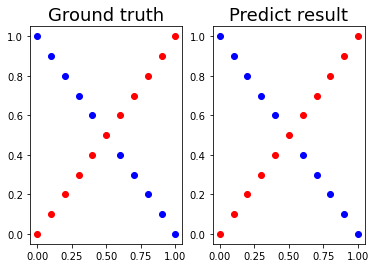

In [4]:
network(epoch=10000, lr=0.1, h1=3, h2=3, distribution='XOR', seed=0)

epoch: 100 accuracy: 0.55 loss: 68.75568788343841
epoch: 200 accuracy: 0.55 loss: 68.6833838173561
epoch: 300 accuracy: 0.55 loss: 68.53864128496537
epoch: 400 accuracy: 0.55 loss: 67.99589128242025
epoch: 500 accuracy: 0.64 loss: 62.160779104889706
epoch: 600 accuracy: 0.97 loss: 22.387828494839425
epoch: 700 accuracy: 0.98 loss: 9.521101813263513
epoch: 800 accuracy: 0.99 loss: 5.777187527724762
epoch: 900 accuracy: 0.99 loss: 4.138501334215425
epoch: 1000 accuracy: 0.99 loss: 3.287730848046888
epoch: 1100 accuracy: 0.99 loss: 2.769802365828347
epoch: 1200 accuracy: 0.99 loss: 2.418428673316855
epoch: 1300 accuracy: 0.99 loss: 2.161932413322647
epoch: 1400 accuracy: 0.99 loss: 1.9646697862054379
epoch: 1486 accuracy: 1.0 loss: 1.8271699427198258


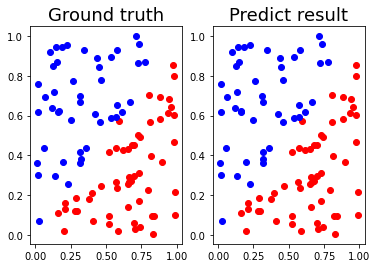

In [5]:
network(epoch=10000, lr=0.01, h1=2, h2=2, distribution='linear', seed=0)

In [6]:
for i in range(5):
    print(network_(epoch=50000, lr=0.5, h1=3, h2=3, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.1, h1=3, h2=3, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.05, h1=3, h2=3, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.01, h1=3, h2=3, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.005, h1=3, h2=3, distribution='XOR', seed=i))

50000 1769 3354 17327 34644
50000 9292 17510 50000 50000
50000 3520 6700 34021 50000
50000 1223 2413 12036 24066
50000 951 1909 9535 19067


In [7]:
for i in range(5):
    print(network_(epoch=50000, lr=0.1, h1=2, h2=2, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.05, h1=2, h2=2, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.01, h1=2, h2=2, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.005, h1=2, h2=2, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.001, h1=2, h2=2, distribution='linear', seed=i))

106 296 1479 2958 14783
277 243 1196 2388 11919
392 328 1669 3339 16696
97 159 789 1574 7860
116 2143 1583 3166 15827


In [8]:
for i in range(5):
    print(network_(epoch=50000, lr=0.1, h1=2, h2=2, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.1, h1=3, h2=3, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.1, h1=5, h2=5, distribution='XOR', seed=i),
          network_(epoch=50000, lr=0.1, h1=10, h2=10, distribution='XOR', seed=i))

50000 1769 1778 1175
50000 9292 2076 1646
10323 3520 2320 1725
50000 1223 1387 1407
50000 951 963 870


In [9]:
for i in range(5):
    print(network_(epoch=50000, lr=0.1, h1=2, h2=2, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.1, h1=3, h2=3, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.1, h1=5, h2=5, distribution='linear', seed=i),
          network_(epoch=50000, lr=0.1, h1=10, h2=10, distribution='linear', seed=i))

275 50000 50000 59


d:\miniconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in multiply
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in greater_equal


176 50000 50000 42
196 50000 50000 160
159 50000 65 39
103 50000 50000 66


epoch: 100 accuracy: 0.5238095238095238 loss: nan
epoch: 200 accuracy: 0.5238095238095238 loss: nan
epoch: 300 accuracy: 0.5238095238095238 loss: nan
epoch: 400 accuracy: 0.5238095238095238 loss: nan
epoch: 500 accuracy: 0.5238095238095238 loss: nan
epoch: 600 accuracy: 0.5238095238095238 loss: nan
epoch: 700 accuracy: 0.5238095238095238 loss: nan
epoch: 800 accuracy: 0.5238095238095238 loss: nan
epoch: 900 accuracy: 0.5238095238095238 loss: nan
epoch: 1000 accuracy: 0.5238095238095238 loss: nan
epoch: 1100 accuracy: 0.5238095238095238 loss: nan
epoch: 1200 accuracy: 0.5238095238095238 loss: nan
epoch: 1300 accuracy: 0.5238095238095238 loss: nan


d:\miniconda3\lib\site-packages\ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in true_divide
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: divide by zero encountered in log
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in multiply
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in log
d:\miniconda3\lib\site-packages\ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in greater_equal


epoch: 1400 accuracy: 0.5238095238095238 loss: nan
epoch: 1500 accuracy: 0.5238095238095238 loss: nan
epoch: 1600 accuracy: 0.5238095238095238 loss: nan
epoch: 1700 accuracy: 0.5238095238095238 loss: nan
epoch: 1800 accuracy: 0.5238095238095238 loss: nan
epoch: 1900 accuracy: 0.5238095238095238 loss: nan
epoch: 2000 accuracy: 0.5238095238095238 loss: nan
epoch: 2100 accuracy: 0.5238095238095238 loss: nan
epoch: 2200 accuracy: 0.5238095238095238 loss: nan
epoch: 2300 accuracy: 0.5238095238095238 loss: nan
epoch: 2400 accuracy: 0.5238095238095238 loss: nan
epoch: 2500 accuracy: 0.5238095238095238 loss: nan
epoch: 2600 accuracy: 0.5238095238095238 loss: nan
epoch: 2700 accuracy: 0.5238095238095238 loss: nan
epoch: 2800 accuracy: 0.5238095238095238 loss: nan
epoch: 2900 accuracy: 0.5238095238095238 loss: nan
epoch: 3000 accuracy: 0.5238095238095238 loss: nan
epoch: 3100 accuracy: 0.5238095238095238 loss: nan
epoch: 3200 accuracy: 0.5238095238095238 loss: nan
epoch: 3300 accuracy: 0.5238095

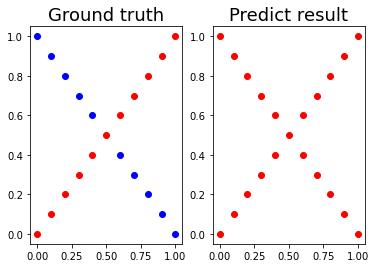

In [10]:
network_no_activation_func(epoch=10000, lr=0.1, h1=3, h2=3, distribution='XOR', seed=0)

d:\miniconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in log


epoch: 100 accuracy: 0.55 loss: nan
epoch: 200 accuracy: 0.55 loss: nan
epoch: 300 accuracy: 0.55 loss: nan
epoch: 400 accuracy: 0.55 loss: nan
epoch: 500 accuracy: 0.55 loss: nan
epoch: 600 accuracy: 0.55 loss: nan
epoch: 700 accuracy: 0.55 loss: nan
epoch: 800 accuracy: 0.55 loss: nan
epoch: 900 accuracy: 0.55 loss: nan
epoch: 1000 accuracy: 0.55 loss: nan
epoch: 1100 accuracy: 0.55 loss: nan
epoch: 1200 accuracy: 0.55 loss: nan
epoch: 1300 accuracy: 0.55 loss: nan
epoch: 1400 accuracy: 0.55 loss: nan
epoch: 1500 accuracy: 0.55 loss: nan
epoch: 1600 accuracy: 0.55 loss: nan
epoch: 1700 accuracy: 0.55 loss: nan
epoch: 1800 accuracy: 0.55 loss: nan
epoch: 1900 accuracy: 0.55 loss: nan
epoch: 2000 accuracy: 0.55 loss: nan
epoch: 2100 accuracy: 0.55 loss: nan
epoch: 2200 accuracy: 0.55 loss: nan
epoch: 2300 accuracy: 0.55 loss: nan
epoch: 2400 accuracy: 0.55 loss: nan
epoch: 2500 accuracy: 0.55 loss: nan
epoch: 2600 accuracy: 0.55 loss: nan
epoch: 2700 accuracy: 0.55 loss: nan
epoch: 280

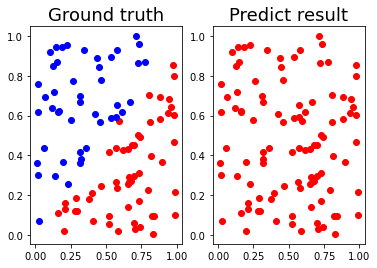

In [11]:
network_no_activation_func(epoch=10000, lr=0.01, h1=2, h2=2, distribution='linear', seed=0)